# Exam result explanination 
* library using across exam: Pandas, Numpy, Scipy
* To calculate the probability of goals in each soccer match, the exam will use the Poisson distribution


### solving the exam step by step

import the library

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats 
from scipy.special import factorial

data = pd.read_csv('raw.csv',encoding='latin-1')
data.info()

import the raw data

In [ ]:
data = pd.read_csv('raw.csv',encoding='latin-1')


calculate the overal average home team score(avg_home_score) and average away team score(avg_away_score) of dataset

In [2]:
avg_home_score = data.h_score.mean()
avg_away_score = data.a_score.mean()

In [3]:
print(avg_home_score)
print(avg_away_score)

1.6877916973716531
0.9371161876688774


input the home team(ht) and away team(at) name from the key board

In [4]:
home_team = input("Enter Home Team: ")
ht = (''.join(home_team.split()))
away_team = input("Enter Away Team: ")
at = (''.join(away_team.split()))

Enter Home Team: Croatia
Enter Away Team: Argentina


### dertermine the average score by ht and average scored conceded by ht 

In [ ]:
avg_scored_by_ht =  data[(data.h_team ==ht)].h_score.mean()
avg_scored_conceded_by_ht = data[(data.h_team ==ht)].a_score.mean()
print(f"average scored by ht {avg_scored_by_ht}")
print(f"average conceded by ht {avg_goals_conceded_by_ht}")

In [6]:
avg_away_scored_by_at =  data[(data.a_team ==at)].a_score.mean()
avg_away_goals_conceded_by_at = data[(data.a_team ==at)].h_score.mean()
print(f"average  away scored by at {avg_away_scored_by_at}")
print(f"average conceded by at {avg_away_goals_conceded_by_at}")

average  away scored by at 1.4705882352941178
average conceded by at 1.3529411764705883


### calculate attack strength

* attack strength is the teams average number of goals, devided by the overall average number of goals
* defence strength is calculated by devide the team's average number of goals conceded by the overall average number of goals conceded

In [7]:
ht_attack_strength = avg_scored_by_ht/avg_home_score
ht_defence_strength = avg_goals_conceded_by_ht/avg_away_score
print(f"ht_attack_strength is {ht_attack_strength}")
print(f"ht_defence_strength is {ht_defence_strength}")

ht_attack_strength is 0.994537081314843
ht_defence_strength is 1.1052143793297138


In [8]:
at_attack_strength = avg_away_scored_by_at/avg_away_score
at_defence_strength = avg_away_goals_conceded_by_at/avg_home_score
print(f"at_attack_strength is {at_attack_strength}")
print(f"at_defence_strength is {at_defence_strength}")

at_attack_strength is 1.5692699097987821
at_defence_strength is 0.8016043559033278


* to determine how many goals ht will likely score, we need to multiply ht attack strength by at's defence strength and the overall average number of home goals
* to determine how many goals at will likely score, we need to multiply at attack strength by ht's defence strength and the overall average number of away goals

In [9]:
goal_expect_by_ht = ht_attack_strength*at_defence_strength*avg_home_score
goal_expect_by_at = at_attack_strength*ht_defence_strength*avg_away_score
print(f"goal_expect_by_ht is {goal_expect_by_ht}")
print(f"goal_expect_by_at is {goal_expect_by_at}")

goal_expect_by_ht is 1.345550168837729
goal_expect_by_at is 1.6253152637201675


## estimate the real home goals and away goals by using scipy stats 

In [11]:
home_goal = int(stats.mode(np.random.poisson(goal_expect_by_ht,100000),keepdims=True)[0])                 
away_goal = int(stats.mode(np.random.poisson(goal_expect_by_at,100000),keepdims=True)[0])
print(f"{ht}'s goals is {home_goal}")
print(f"{at}'s goals is {away_goal}")

Croatia's goals is 1
Argentina's goals is 1


# estimate the the win probability (win/draw/lose)

In [12]:


def poisson(k,exp_events):
    minutes=90
    lam =(exp_events)
    p_k= np.exp(-lam)*np.power(lam,k)/factorial(k) #possion formula
    print(f'The probability of {k} goals in {minutes} minutes is {100*p_k:.2f}%.')
    return p_k

calculate the probability having n goals of ht in each match

In [31]:
k=[]
p_k_ht=[]
for i in range(10):
    p_k_ht.append(poisson(i,home_goal))
    k.append(i)

The probability of 0 goals in 90 minutes is 36.79%.
The probability of 1 goals in 90 minutes is 36.79%.
The probability of 2 goals in 90 minutes is 18.39%.
The probability of 3 goals in 90 minutes is 6.13%.
The probability of 4 goals in 90 minutes is 1.53%.
The probability of 5 goals in 90 minutes is 0.31%.
The probability of 6 goals in 90 minutes is 0.05%.
The probability of 7 goals in 90 minutes is 0.01%.
The probability of 8 goals in 90 minutes is 0.00%.
The probability of 9 goals in 90 minutes is 0.00%.


In [32]:
print(p_k_ht)

[0.36787944117144233, 0.36787944117144233, 0.18393972058572117, 0.06131324019524039, 0.015328310048810098, 0.0030656620097620196, 0.0005109436682936699, 7.299195261338141e-05, 9.123994076672677e-06, 1.0137771196302974e-06]


calculate the probability having n goals of at in each match

In [33]:
m=[]
p_k_at=[]
for i in range(10):
    p_k_at.append(poisson(i,away_goal))
    m.append(i)

The probability of 0 goals in 90 minutes is 36.79%.
The probability of 1 goals in 90 minutes is 36.79%.
The probability of 2 goals in 90 minutes is 18.39%.
The probability of 3 goals in 90 minutes is 6.13%.
The probability of 4 goals in 90 minutes is 1.53%.
The probability of 5 goals in 90 minutes is 0.31%.
The probability of 6 goals in 90 minutes is 0.05%.
The probability of 7 goals in 90 minutes is 0.01%.
The probability of 8 goals in 90 minutes is 0.00%.
The probability of 9 goals in 90 minutes is 0.00%.


In [55]:
print(p_k_at)

[0.36787944117144233, 0.36787944117144233, 0.18393972058572117, 0.06131324019524039, 0.015328310048810098, 0.0030656620097620196, 0.0005109436682936699, 7.299195261338141e-05, 9.123994076672677e-06, 1.0137771196302974e-06]


to get each posible score, simply multiply the probability of each posible score by each team by the probability of each possible score by the other team. that gives you the following disstibution  

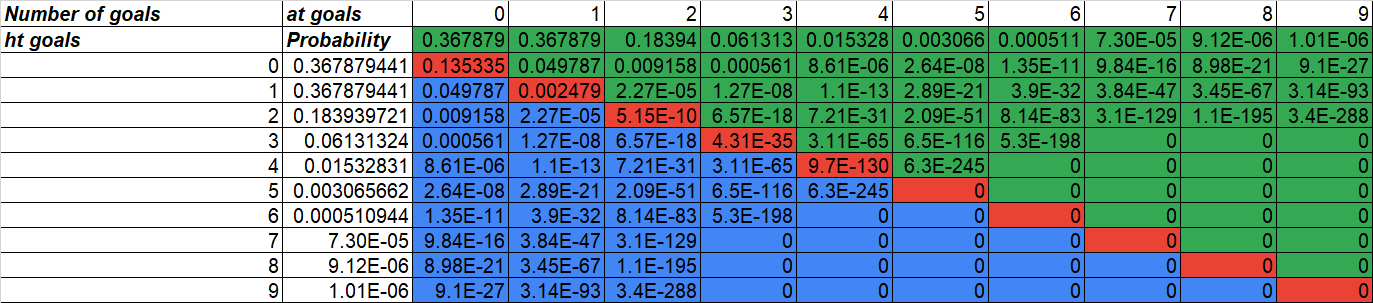


to calculate the chance of ht draw, we add all the red squares from the table above: that give us an estimated draw chance of ht

In [59]:
percentage_draw = 0
for k in range(10):
    
    percentage_draw +=  (p_k_at[k] * p_k_ht[k])

In [60]:
print(f"the {ht} team has percentage of draw: {percentage_draw}")

the Croatia team has percentage of draw: 0.3085083225536607


to calculate the chance of ht win, we add all the blue squares from the table above: that give us an estimated win chance of ht 

In [61]:
percentage_win = 0
for k in range(1,9):
    for m in range(k):
        percentage_win +=  (p_k_ht[k] * p_k_at[m])

In [62]:
print(f"the {ht} team has percentage of win: {percentage_win}")

the Croatia team has percentage of win: 0.34574471352171876


to calculate the chance of ht lose, we add all the green squares from the table above: that give us an estimated lose chance of ht

In [51]:
percentage_lose = 0
for k in range(1,9):
    for m in range(k):
        percentage_lose +=  (p_k_at[k] * p_k_ht[m])

In [58]:
print(f"the {ht} team has percentage of lose: {percentage_lose}")

the Croatia team has percentage of lose: 0.34574471352171876
